<a href="https://colab.research.google.com/github/yaroslavtsepkov/colab/blob/master/my_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize, scale
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time

In [ ]:
# N = 7 clouds
M = 888

In [ ]:
noise = np.random.randn(M,2)

In [ ]:
cloud1 = noise + np.array([2.4,3.2]) + 10
cloud2 = noise + np.array([-2, 2.9]) + 10
cloud3 = noise + np.array([2, -2.7]) + 10
cloud4 = noise + np.array([-2, -2]) + 10
cloud5 = noise + np.array([1, 1.1]) + 10
cloud6 = noise + np.array([2, -1.1]) + 10
cloud7 = noise + np.array([-2, 1]) + 10

In [ ]:
data = np.vstack([cloud1, cloud2, cloud3, cloud4, cloud5, cloud6, cloud7])

In [ ]:
annotation1 = [0]*M
annotation2 = [1]*M
annotation3 = [2]*M
annotation4 = [3]*M
annotation5 = [4]*M
annotation6 = [5]*M
annotation7 = [6]*M
annotations = annotation1 + annotation2 + annotation3 + annotation4 + annotation5 + annotation6 + annotation7

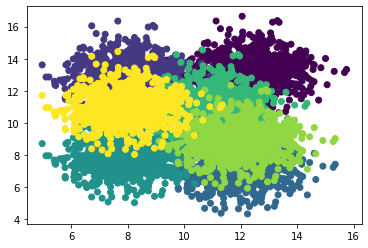

In [ ]:
plt.scatter(data[:,0], data[:,1], c=annotations)

In [ ]:
data, annotations = shuffle(data, annotations)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, annotations, test_size=0.25)

In [ ]:
Xtrain.shape, Xtest.shape

((4662, 2), (1554, 2))

In [ ]:
len(Ytrain), len(Ytest)

(4662, 1554)

In [ ]:
epoch = 10

# Naive Bayes

In [ ]:
data_time = pd.DataFrame(columns=['time_nb', 'acc_nb' ])

In [ ]:
times = []
accuracy_list = []
for _ in range(epoch):
    s = time.time()
    nb = GaussianNB()
    nb.fit(Xtrain,Ytrain)
    y_pred = nb.predict(Xtest)
    p = time.time()
    accuracy_list.append(accuracy_score(Ytest, y_pred))
    times.append(p-s)

In [ ]:
data_time.time_nb = times
data_time.acc_nb = accuracy_list

In [ ]:
data_time.mean()

time_nb    0.002999
acc_nb     0.776062
dtype: float64

In [ ]:
confusion_matrix(Ytest, y_pred)

array([[204,   2,   0,   0,  24,   1,   0],
       [  2, 179,   0,   0,   8,   0,  32],
       [  0,   0, 167,   2,   1,  40,   0],
       [  0,   0,   0, 212,   1,   4,  17],
       [ 23,   5,   0,   4, 142,  31,  18],
       [  1,   0,  48,   3,  24, 148,   1],
       [  0,  32,   0,   9,  15,   0, 154]])

# Multinomial model

In [ ]:
times = []
accuracy_list = []
for _ in range(epoch):
    s = time.time()
    mnb = MultinomialNB(alpha=0.5)
    y_pred = mnb.fit(Xtrain, Ytrain).predict(Xtest)
    p = time.time()
    accuracy_list.append(accuracy_score(Ytest, y_pred))
    times.append(p-s)
data_time['time_mnb'] = times
data_time['acc_mnb'] = accuracy_list
data_time.mean()

time_nb     0.002999
acc_nb      0.776062
time_mnb    0.002198
acc_mnb     0.500000
dtype: float64

In [ ]:
confusion_matrix(Ytest, y_pred)

array([[ 78,   0,   0,   0, 109,   6,  38],
       [  3, 151,   0,   0,   0,   0,  67],
       [  0,   0, 164,   0,   2,  44,   0],
       [ 31,   2,   5,   0, 124,  35,  37],
       [ 42,   0,   0,   0, 128,  28,  25],
       [  0,   0,  66,   0,  28, 131,   0],
       [ 21,  52,   0,   0,  12,   0, 125]])

# Complenent Naive Bayes

In [ ]:
times = []
accuracy_list = []
for _ in range(epoch):
    s = time.time()
    cnb = ComplementNB()
    y_pred = cnb.fit(Xtrain, Ytrain).predict(Xtest)
    p = time.time()
    accuracy_list.append(accuracy_score(Ytest, y_pred))
    times.append(p-s)
data_time['time_cnb'] = times
data_time['acc_cnb'] = accuracy_list
data_time.mean()

time_nb     0.002999
acc_nb      0.776062
time_mnb    0.002198
acc_mnb     0.500000
time_cnb    0.002024
acc_cnb     0.277349
dtype: float64

In [ ]:
confusion_matrix(Ytest, y_pred)

array([[  0, 168,  63,   0,   0,   0,   0],
       [  0, 221,   0,   0,   0,   0,   0],
       [  0,   0, 210,   0,   0,   0,   0],
       [  0, 103, 131,   0,   0,   0,   0],
       [  0, 112, 111,   0,   0,   0,   0],
       [  0,   4, 221,   0,   0,   0,   0],
       [  0, 205,   5,   0,   0,   0,   0]])

# Bernulli

In [ ]:
times = []
accuracy_list = []
for _ in range(epoch):
    s = time.time()
    bnb = ComplementNB()
    y_pred = bnb.fit(Xtrain, Ytrain).predict(Xtest)
    p = time.time()
    accuracy_list.append(accuracy_score(Ytest, y_pred))
    times.append(p-s)
data_time['time_bnb'] = times
data_time['acc_bnb'] = accuracy_list
data_time.mean()

time_nb     0.002999
acc_nb      0.776062
time_mnb    0.002198
acc_mnb     0.500000
time_cnb    0.002024
acc_cnb     0.277349
time_bnb    0.002372
acc_bnb     0.277349
dtype: float64

In [ ]:
confusion_matrix(Ytest, y_pred)

array([[  0, 168,  63,   0,   0,   0,   0],
       [  0, 221,   0,   0,   0,   0,   0],
       [  0,   0, 210,   0,   0,   0,   0],
       [  0, 103, 131,   0,   0,   0,   0],
       [  0, 112, 111,   0,   0,   0,   0],
       [  0,   4, 221,   0,   0,   0,   0],
       [  0, 205,   5,   0,   0,   0,   0]])

# Naive Bayes without sklearn

In [ ]:
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float32)
        self._var = np.zeros((n_classes, n_features), dtype=np.float32)
        self._priors =  np.zeros(n_classes, dtype=np.float32)

        for idx, c in enumerate(self._classes):
            X_c = X[y==c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self.gauss(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
            
        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]
            

    def gauss(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(- (x-mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator 

In [ ]:
times = []
accuracy_list = []
for _ in range(epoch):
    s = time.time()
    gnb = NaiveBayes()
    gnb.fit(Xtrain, Ytrain)
    y_pred = gnb.predict(Xtest)
    p = time.time()
    accuracy_list.append(accuracy_score(Ytest, y_pred))
    times.append(p-s)
data_time['time_nb_without_sklean'] = times
data_time['acc_nb_without_sklean'] = accuracy_list
data_time.mean()

time_nb                   0.002999
acc_nb                    0.776062
time_mnb                  0.002198
acc_mnb                   0.500000
time_cnb                  0.002024
acc_cnb                   0.277349
time_bnb                  0.002372
acc_bnb                   0.277349
time_nb_without_sklean    0.282755
acc_nb_without_sklean     0.776062
dtype: float64

In [ ]:
confusion_matrix(Ytest, y_pred)

array([[204,   2,   0,   0,  24,   1,   0],
       [  2, 179,   0,   0,   8,   0,  32],
       [  0,   0, 167,   2,   1,  40,   0],
       [  0,   0,   0, 212,   1,   4,  17],
       [ 23,   5,   0,   4, 142,  31,  18],
       [  1,   0,  48,   3,  24, 148,   1],
       [  0,  32,   0,   9,  15,   0, 154]])

# Result

In [ ]:
mean_time = pd.DataFrame(columns=['nb', 'mnb', 'cnb', 'bnb', 'nb_w_sklearn'], index=['mean_time'])

In [ ]:
mean_time.nb=data_time.time_nb.mean()
mean_time.mnb=data_time.time_mnb.mean()
mean_time.cnb=data_time.time_cnb.mean()
mean_time.bnb=data_time.time_bnb.mean()
mean_time.nb_w_sklearn=data_time.time_nb_without_sklean.mean()

In [ ]:
mean_acc = pd.DataFrame(columns=['nb', 'mnb', 'cnb', 'bnb', 'nb_w_sklearn'], index=['mean_acc'])

In [ ]:
mean_acc.nb=data_time.acc_nb.mean()
mean_acc.mnb=data_time.acc_mnb.mean()
mean_acc.cnb=data_time.acc_cnb.mean()
mean_acc.bnb=data_time.acc_bnb.mean()
mean_acc.nb_w_sklearn=data_time.acc_nb_without_sklean.mean()

In [ ]:
print('best of time', min(mean_time))

best of time bnb


In [ ]:
print('best of time', max(mean_acc))

best of time nb_w_sklearn


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

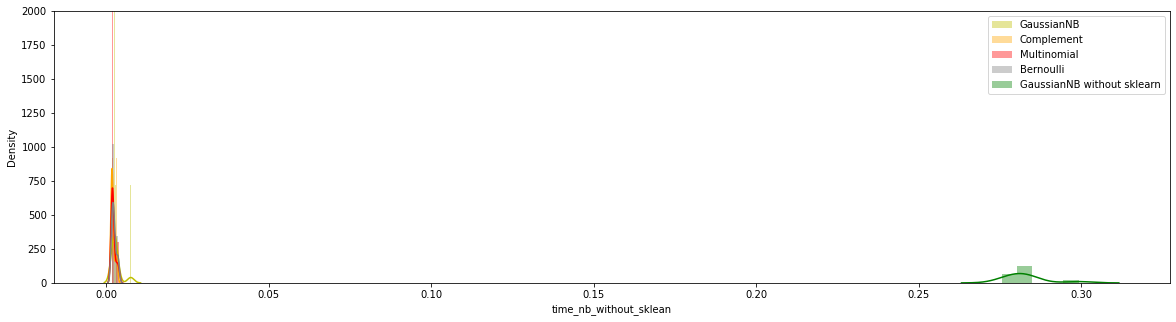

In [ ]:
plt.figure(figsize=(20,5))
sns.distplot(data_time['time_nb'], color="y", label="GaussianNB")
sns.distplot(data_time['time_cnb'], color="orange", label="Complement")
sns.distplot(data_time['time_mnb'], color="red", label="Multinomial")
sns.distplot(data_time['time_bnb'], color="gray", label="Bernoulli")
sns.distplot(data_time['time_nb_without_sklean'], color="green", label="GaussianNB without sklearn")
plt.ylim(0,2000)

plt.legend()
plt.show()